# Objective
    1) Predict images with/without defect(s)
    2) set the predicted images without defects to Nan
This kernel has memory problem. Solution: data_generator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
train = pd.read_csv('./input/train.csv')
print("train.shape:", train.shape)
train.head()

train.shape: (50272, 2)


,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


# Preprocessing

## 1) Split into ImageId, ClassId

In [3]:
train['ImageId'] = train['ImageId_ClassId'].str[:-2]
train['ClassId'] = train['ImageId_ClassId'].str[-1:]
train['defect'] = train['EncodedPixels'].notnull()

train = train[['ImageId','ClassId','defect','EncodedPixels']]

In [4]:
print('{} = no. of train_images * 4'.format(train.shape[0]))
print('train.shape:', train.shape)
train.head()

50272 = no. of train_images * 4
train.shape: (50272, 4)


,ImageId,ClassId,defect,EncodedPixels
0,0002cc93b.jpg,1,True,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,False,NaN
2,0002cc93b.jpg,3,False,NaN
3,0002cc93b.jpg,4,False,NaN
4,00031f466.jpg,1,False,NaN


# y_train (image with/without defect(s))

In [5]:
y_train = train.groupby(by='ImageId', axis=0, as_index=False).agg({'defect':'max'})

In [6]:
print('There are {} train_images in total'.format(y_train.shape[0]))
print('train.shape:', y_train.shape)
y_train.head(10)

There are 12568 train_images in total
train.shape: (12568, 2)


,ImageId,defect
0,0002cc93b.jpg,True
1,00031f466.jpg,False
2,000418bfc.jpg,False
3,000789191.jpg,False
4,0007a71bf.jpg,True
5,000a4bcdd.jpg,True
6,000f6bf48.jpg,True
7,0014fce06.jpg,True
8,001982b08.jpg,False
9,001d1b355.jpg,False


True     6666
False    5902
Name: defect, dtype: int64


Text(0, 0.5, 'No. of images')

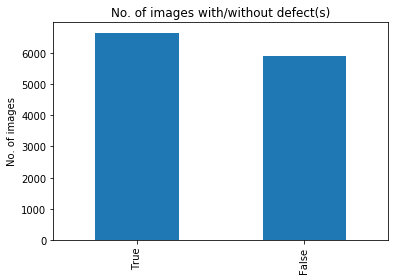

In [7]:
print(y_train['defect'].value_counts())

y_train['defect'].value_counts().plot(kind='bar')
plt.title("No. of images with/without defect(s)")
plt.ylabel("No. of images")

# x_train (Train images)

In [8]:
# train file path
img_path = "./input/train_images/"

file_paths = []
for i in range(y_train.shape[0]):
    file_paths.append(img_path + str(y_train['ImageId'].iloc[i]))

print("len(file_paths):", len(file_paths))
file_paths[:5]

len(file_paths): 12568


['./input/train_images/0002cc93b.jpg',
 './input/train_images/00031f466.jpg',
 './input/train_images/000418bfc.jpg',
 './input/train_images/000789191.jpg',
 './input/train_images/0007a71bf.jpg']

In [12]:
# train images -> array

img_size = 256
x = []

for i, file_path in enumerate(file_paths):
    img = cv2.imread(file_path)                                  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                   # convert color
    img = cv2.resize(img, (img_size, img_size))                  # resize
    img = img / 255.0                                            # normalization
    
    x += [img]                                                   # x.append(img)

x_train = np.array(x)

MemoryError: 

In [ ]:
print("x_train.shape:", x_train.shape)
x_train[0]

x_train[0].shape: (256, 256, 3)


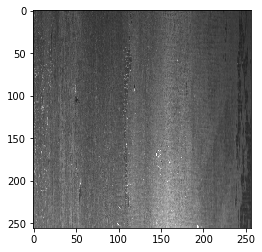

In [12]:
print('x_train[0].shape:', x_train[0].shape)
plt.imshow(x_train[0])

# y_pred (sample_submission)

In [18]:
sample_submission = pd.read_csv("./input/sample_submission.csv")
print("sample_submission.shape:", sample_submission.shape)
sample_submission.head()

sample_submission.shape: (7204, 2)


,ImageId_ClassId,EncodedPixels
0,004f40c73.jpg_1,1 1
1,004f40c73.jpg_2,1 1
2,004f40c73.jpg_3,1 1
3,004f40c73.jpg_4,1 1
4,006f39c41.jpg_1,1 1


## 1) Split into ImageId, ClassId

In [19]:
sample_submission['ImageId'] = sample_submission['ImageId_ClassId'].str[:-2]
sample_submission['ClassId'] = sample_submission['ImageId_ClassId'].str[-1:]
sample_submission['defect'] = 0

sample_submission = sample_submission[['ImageId','ClassId','defect']]

In [20]:
print('{} = no. of test_images * 4'.format(sample_submission.shape[0]))
print('sample_submission.shape:', sample_submission.shape)
sample_submission.head()

7204 = no. of test_images * 4
sample_submission.shape: (7204, 3)


,ImageId,ClassId,defect
0,004f40c73.jpg,1,0
1,004f40c73.jpg,2,0
2,004f40c73.jpg,3,0
3,004f40c73.jpg,4,0
4,006f39c41.jpg,1,0


## 2) Groupby 'ImageId'

In [21]:
sample_submission = sample_submission.groupby(by='ImageId', axis=0, as_index=False).agg({'defect':'max'})

In [22]:
print('There are {} test_images in total'.format(sample_submission.shape[0]))
print('sample_submission.shape:', sample_submission.shape)
sample_submission.head(10)

There are 1801 test_images in total
sample_submission.shape: (1801, 2)


,ImageId,defect
0,004f40c73.jpg,0
1,006f39c41.jpg,0
2,00b7fb703.jpg,0
3,00bbcd9af.jpg,0
4,0108ce457.jpg,0
5,0109b68ec.jpg,0
6,010ec96b4.jpg,0
7,015be539e.jpg,0
8,017bd7ce3.jpg,0
9,01b47d973.jpg,0


# x_test (Test images)

In [23]:
# test file path
img_path = "./input/test_images/"

file_paths = []
for i in range(sample_submission.shape[0]):
    file_paths.append(img_path + str(sample_submission['ImageId'].iloc[i]))

print("len(file_paths):", len(file_paths))
file_paths[:5]

len(file_paths): 1801


['./input/test_images/004f40c73.jpg',
 './input/test_images/006f39c41.jpg',
 './input/test_images/00b7fb703.jpg',
 './input/test_images/00bbcd9af.jpg',
 './input/test_images/0108ce457.jpg']

In [34]:
# test images -> array

img_size = 256
x = []

for i, file_path in enumerate(file_paths):
    img = cv2.imread(file_path)                                  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                   # convert color
    img = cv2.resize(img, (img_size, img_size))                  # resize
    img = img/255.0                                              # normalization
    
    x.append(img)

x_test = np.array(x)

In [37]:
print("x_test.shape:", x_test.shape)
x_test[0]

x_test.shape: (1801, 256, 256, 3)


array([[[45, 45, 45],
        [48, 48, 48],
        [58, 58, 58],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[45, 45, 45],
        [46, 46, 46],
        [56, 56, 56],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[47, 47, 47],
        [47, 47, 47],
        [52, 52, 52],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[77, 77, 77],
        [69, 69, 69],
        [74, 74, 74],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[77, 77, 77],
        [55, 55, 55],
        [65, 65, 65],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[77, 77, 77],
        [58, 58, 58],
        [64, 64, 64],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 2,  2,  2]]], dtype=uint8)

x_test[0].shape: (256, 256, 3)


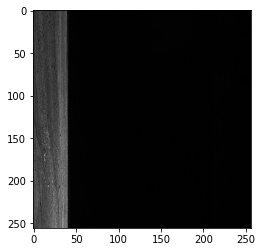

In [38]:
print('x_test[0].shape:', x_test[0].shape)
plt.imshow(x_test[0])

# Normalize x_train, x_test

In [39]:
# from range [0-255] to [0-1]
x_train = x_train / 255.0
x_test = x_test / 255.0

MemoryError: 